In [1]:
packages <- c("viridis", "readr", "jsonlite", "httr", "ggplot2", "dplyr", "stringr")
for(pkg in packages) {
  library(pkg, character.only = TRUE)
}
packages <- c("viridis", "readr", "jsonlite", "httr", "ggplot2", "dplyr", "stringr")
lapply(packages, library, character.only = TRUE)


Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[[1]]
 [1] "stringr"     "dplyr"       "ggplot2"     "httr"        "jsonlite"   
 [6] "readr"       "viridis"     "viridisLite" "repr"        "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[2]]
 [1] "stringr"     "dplyr"       "ggplot2"     "httr"        "jsonlite"   
 [6] "readr"       "viridis"     "viridisLite" "repr"        "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[3]]
 [1] "stringr"     "dplyr"       "ggplot2"     "httr"        "jsonlite"   
 [6] "readr"       "viridis"     "viridisLite" "repr"        "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[4]]
 [1] "stringr"     "dplyr"       "ggplot2"     "httr"        "jsonlite"   
 [6] "readr"       "viridis"     "viridisLite" "repr"        "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[5]]
 [1] "stringr"     "dplyr"       "ggplot2"     "httr"        "jsonlite"   
 [6] "readr"       "viridis"     "viridisLite" "repr"        "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[6]]
 [1] "stringr"     "dplyr"       "ggplot2"     "httr"        "jsonlite"   
 [6] "readr"       "viridis"     "viridisLite" "repr"        "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[7]]
 [1] "stringr"     "dplyr"       "ggplot2"     "httr"        "jsonlite"   
 [6] "readr"       "viridis"     "viridisLite" "repr"        "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"

In [2]:
url <- "http://data.insideairbnb.com/greece/attica/athens/2023-09-21/data/listings.csv.gz"
Greece <- read_csv(gzcon(url(description = url, open = "r")))

Rows: 12955 Columns: 75
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (25): listing_url, source, name, description, neighborhood_overview, pi...
dbl  (37): id, scrape_id, host_id, host_listings_count, host_total_listings_...
lgl   (8): host_is_superhost, host_has_profile_pic, host_identity_verified, ...
date  (5): last_scraped, host_since, calendar_last_scraped, first_review, la...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
Greece$price <- as.numeric(str_remove_all(Greece$price, "[$,]"))

In [4]:
api_key <- "58c8eb71a98bc0e70380918c4ec1041c"
response <- GET(paste0("http://data.fixer.io/api/latest?access_key=", api_key, "&symbols=EUR,NZD"))
data <- fromJSON(content(response, as = "text"))
exchange_rate_eur_to_nzd <- data$rates$NZD / data$rates$EUR
Greece$price_nzd <- Greece$price * exchange_rate_eur_to_nzd
Greece_nzd <- Greece %>% mutate(price_nzd = price * exchange_rate_eur_to_nzd) %>% select(price_nzd, bathrooms_text, bedrooms)
Greece_nzd

price_nzd,bathrooms_text,bedrooms
<dbl>,<chr>,<dbl>
257.90414,2 baths,3
125.37007,1 bath,1
152.23508,1 bath,NA
107.46006,1 bath,1
62.68503,1 bath,1
152.23508,1 bath,1
89.55005,1 shared bath,NA
177.30910,1 bath,1
69.84904,1 shared bath,1


In [ ]:
p_hist <- ggplot(Greece, aes(x = price)) +
  geom_histogram(aes(fill = as.factor(beds)), bins = 30, alpha = 0.7) +
  labs(
    title = "Relationship between beds and price in Greece in NZD",
    x = "Price",
    y = "Count",
    fill = "Beds"
  ) +
  theme_light(base_size = 9.5) +
  theme(
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", size = rel(1.5), hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_text(face = "bold")
  ) +
  scale_x_continuous(breaks = seq(0, 1500, 250), limits = c(0, 1500)) +
  scale_fill_brewer(palette = "Set3")

print(p_hist)


In [ ]:
#Make a boxplot to see the relationship between room types and prices
p <- ggplot(Greece_nzd, aes(x = bathrooms_text, y = price_nzd)) +
  geom_boxplot(aes(fill = bathrooms_text), outlier.shape = NA) +
  labs(
    title = "Boxplot of Prices by Room Type in Greece in NZD",
    x = "Room Type",
    y = "Price in NZD"
  ) +
  theme_light(base_size = 9.5) +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", size = rel(1.5), hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_text(face = "bold")
  ) +
  scale_y_continuous(breaks = seq(0, 2000, 500), limits = c(0, 2000)) +
  scale_fill_brewer(palette = "Set3")

print(p)


In [ ]:
p <- ggplot(Greece_nzd, aes(x = price_nzd)) +
  geom_histogram(binwidth = 100, fill = "#74c476", color = "#238b45", boundary = 0, closed = "left") + 
  labs(
    title = "Distribution of Prices of Airbnb in Greece in NZD",
    x = "Price",
    y = "Count"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", size = rel(1.5), hjust = 0.5),
    panel.grid.major = element_line(linetype = "dashed", color = "gray85"), 
    panel.background = element_rect(fill = "white"), 
    axis.line = element_line(color = "black") 
  ) +
  scale_x_continuous(breaks = seq(0, 2000, 250), limits = c(0, 2000)) 

print(p)

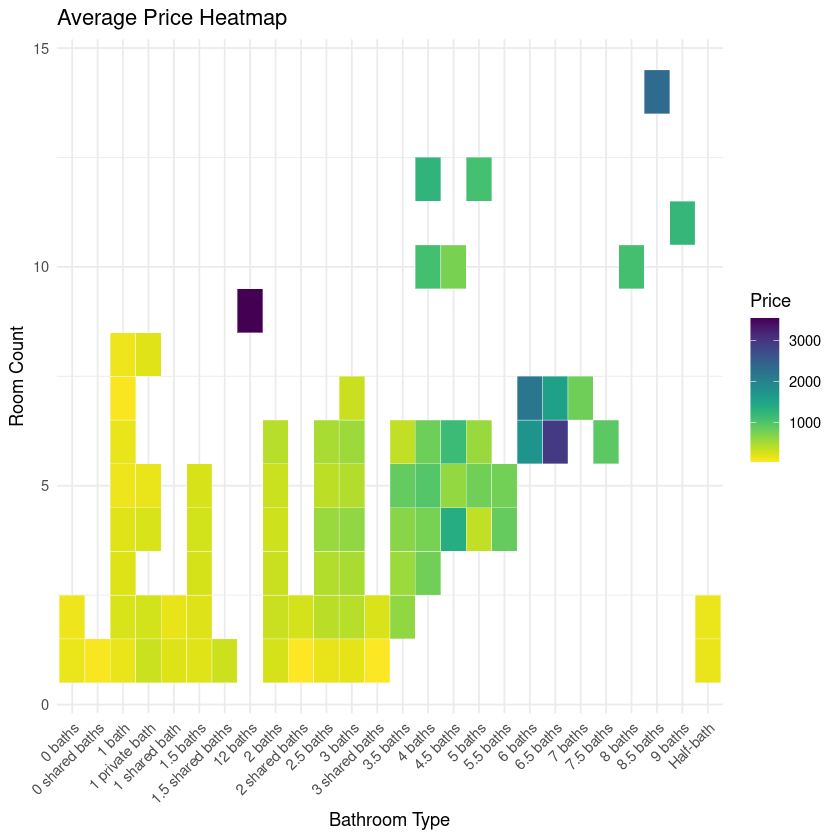

In [8]:
average_price <- aggregate(price_nzd ~ bathrooms_text + bedrooms, data=Greece_nzd, FUN=mean)
ggplot(average_price, aes(x=bathrooms_text, y=bedrooms)) +
  geom_tile(aes(fill=price_nzd), color='white') +
  scale_fill_viridis(name="Price", direction=-1) +  
  theme_minimal() +  
  labs(title="Average Price Heatmap", x="Bathroom Type", y="Room Count") +
  theme(axis.text.x = element_text(angle=45, hjust=1))